In [40]:
import sqlite3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.tseries.offsets import BDay
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
import yfinance

In [2]:
CLOSE = "Close"

Récupérer l'historique de l'action Apple (APPL) grâce à l'API en ligne de Yahoo Finance. En backup, le fichier apple_history.csv est aussi fourni dans le dépôt Github.

In [3]:
apple = yfinance.Ticker("AAPL")
apple_df = apple.history(start="2010-01-01", end="2025-01-01").sort_index()
print(apple_df.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-01-04 00:00:00-05:00  6.414466  6.446624  6.382909  6.431898  493729600   
2010-01-05 00:00:00-05:00  6.449629  6.479382  6.409055  6.443017  601904800   
2010-01-06 00:00:00-05:00  6.443017  6.468563  6.333920  6.340532  552160000   
2010-01-07 00:00:00-05:00  6.363973  6.371487  6.282827  6.328809  477131200   
2010-01-08 00:00:00-05:00  6.320395  6.371487  6.283128  6.370886  447610800   

                           Dividends  Stock Splits  
Date                                                
2010-01-04 00:00:00-05:00        0.0           0.0  
2010-01-05 00:00:00-05:00        0.0           0.0  
2010-01-06 00:00:00-05:00        0.0           0.0  
2010-01-07 00:00:00-05:00        0.0           0.0  
2010-01-08 00:00:00-05:00        0.0           0.0  


In [4]:
# Alternative : chargement du fichier apple_history.csv

Explorer ce fichier ? Y a-t-il des valeurs manquantes ?

In [5]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2010-01-04 00:00:00-05:00 to 2024-12-31 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3774 non-null   float64
 1   High          3774 non-null   float64
 2   Low           3774 non-null   float64
 3   Close         3774 non-null   float64
 4   Volume        3774 non-null   int64  
 5   Dividends     3774 non-null   float64
 6   Stock Splits  3774 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 235.9 KB


Pas de valeurs manquantes.

In [6]:
apple_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3774.000000,3774.000000,3774.000000,3774.000000,3.774000e+03,3774.000000,3774.000000
mean,67.377155,68.086942,66.709768,67.433262,2.299191e+08,0.002316,0.002915
std,65.438023,66.125668,64.819099,65.516757,2.180723e+08,0.020785,0.131222
min,5.781524,5.890621,5.717808,5.771907,2.323470e+07,0.000000,0.000000
25%,17.442398,17.622329,17.293330,17.438810,8.492275e+07,0.000000,0.000000
50%,35.308426,35.681947,34.917553,35.277452,1.403920e+08,0.000000,0.000000
75%,126.173641,127.831551,124.664323,126.743408,3.081386e+08,0.000000,0.000000
max,257.568678,259.474086,257.010028,258.396667,1.880998e+09,0.250000,7.000000


In [7]:
apple_df.head(20)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,6.414466,6.446624,6.382909,6.431898,493729600,0.0,0.0
2010-01-05 00:00:00-05:00,6.449629,6.479382,6.409055,6.443017,601904800,0.0,0.0
2010-01-06 00:00:00-05:00,6.443017,6.468563,6.333920,6.340532,552160000,0.0,0.0
2010-01-07 00:00:00-05:00,6.363973,6.371487,6.282827,6.328809,477131200,0.0,0.0
2010-01-08 00:00:00-05:00,6.320395,6.371487,6.283128,6.370886,447610800,0.0,0.0
2010-01-11 00:00:00-05:00,6.395530,6.401541,6.264795,6.314685,462229600,0.0,0.0
2010-01-12 00:00:00-05:00,6.287033,6.304465,6.203784,6.242854,594459600,0.0,0.0
2010-01-13 00:00:00-05:00,6.247364,6.339329,6.134059,6.330914,605892000,0.0,0.0
2010-01-14 00:00:00-05:00,6.314685,6.325204,6.281926,6.294248,432894000,0.0,0.0


Visualiser l'historique des prix de clôture sur un graphe simple.

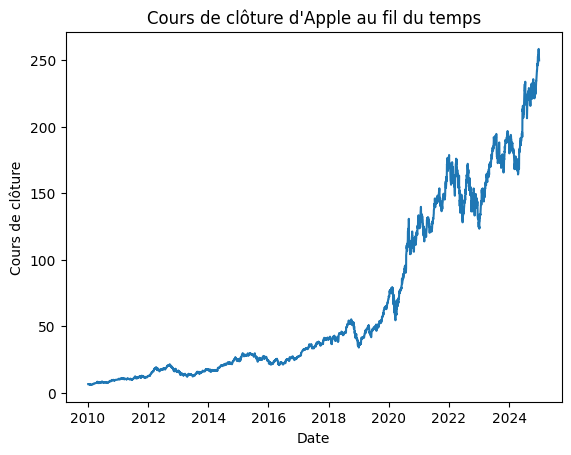

In [8]:
plt.figure()
plt.plot(apple_df.index, apple_df[CLOSE])
plt.title("Cours de clôture d'Apple au fil du temps")
plt.xlabel("Date")
plt.ylabel("Cours de clôture")
plt.show()

Calculer la variation relative du cours de clôture d'une journée à l'autre. Pour cela, chercher dans la documentation ou sur internet une méthode des Series de pandas réalisant directement ce calcul.

In [9]:
apple_df["pct_change"] = apple_df[CLOSE].pct_change()

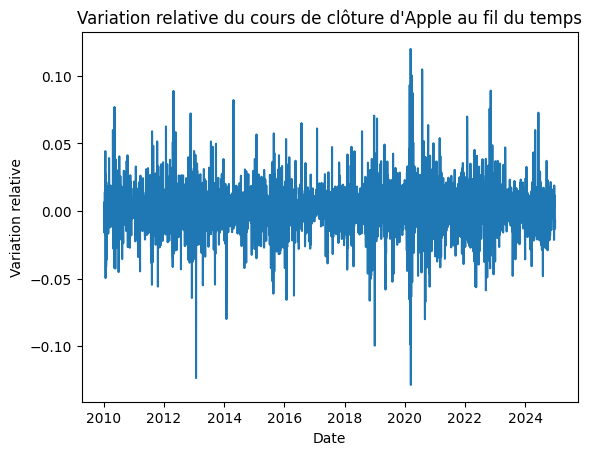

In [10]:
plt.figure()
plt.plot(apple_df.index, apple_df["pct_change"])
plt.title("Variation relative du cours de clôture d'Apple au fil du temps")
plt.xlabel("Date")
plt.ylabel("Variation relative")
plt.show()

A l'aide de scipy, calculer le z-score associé à cette colonne. Déterminer les journées à variations atypiques à partir de ce score (vous pouvez par exemple par un seuil égal à 5, à 3...).

In [11]:
apple_df["z_score"] = zscore(
    a=apple_df["pct_change"],
    nan_policy="omit",
)

In [12]:
thresh = 5
unusual_mask = abs(apple_df["z_score"]) > thresh
unusual_df = apple_df[unusual_mask]
unusual_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,pct_change,z_score
Date,,,,,,,,,
2013-01-24 00:00:00-05:00,13.947698,14.121438,13.652066,13.659648,1460852400,0.0,0.0,-0.123558,-7.104545
2019-01-03 00:00:00-05:00,34.297226,34.711709,33.825574,33.870834,365248800,0.0,0.0,-0.099607,-5.739805
2020-03-02 00:00:00-05:00,68.413715,73.057356,67.308548,72.419945,341397200,0.0,0.0,0.093101,5.240894
2020-03-12 00:00:00-04:00,62.029918,65.437516,60.105570,60.161312,418474000,0.0,0.0,-0.098755,-5.691223
2020-03-13 00:00:00-04:00,64.199074,67.841763,61.305276,67.369156,370732000,0.0,0.0,0.119809,6.762750
2020-03-16 00:00:00-04:00,58.639285,62.790929,58.166681,58.702301,322423600,0.0,0.0,-0.128647,-7.394529
2020-03-24 00:00:00-04:00,57.284492,60.030445,56.785229,59.834133,287531200,0.0,0.0,0.100325,5.652569
2020-07-31 00:00:00-04:00,100.011335,103.442738,98.008868,103.292068,374336800,0.0,0.0,0.104689,5.901196
2022-11-10 00:00:00-05:00,139.433828,144.991821,137.716074,144.991821,118854000,0.0,0.0,0.088975,5.005792


Afficher les lignes associées, ainsi que les lignes des journées précédentes.

In [13]:
display_mask = unusual_mask | unusual_mask.shift(-1)
display_df = apple_df[display_mask]
display_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,pct_change,z_score
Date,,,,,,,,,
2013-01-23 00:00:00-05:00,15.427673,15.615058,15.305177,15.585343,861509600,0.0,0.0,0.018306,0.979003
2013-01-24 00:00:00-05:00,13.947698,14.121438,13.652066,13.659648,1460852400,0.0,0.0,-0.123558,-7.104545
2019-01-02 00:00:00-05:00,36.896077,37.839383,36.738858,37.617847,148158800,0.0,0.0,0.001141,0.000926
2019-01-03 00:00:00-05:00,34.297226,34.711709,33.825574,33.870834,365248800,0.0,0.0,-0.099607,-5.739805
2020-02-28 00:00:00-05:00,62.349852,67.475790,62.134147,66.251862,426510000,0.0,0.0,-0.000585,-0.097394
2020-03-02 00:00:00-05:00,68.413715,73.057356,67.308548,72.419945,341397200,0.0,0.0,0.093101,5.240894
2020-03-11 00:00:00-04:00,67.228573,68.156813,65.888309,66.753540,255598800,0.0,0.0,-0.034731,-2.043056
2020-03-12 00:00:00-04:00,62.029918,65.437516,60.105570,60.161312,418474000,0.0,0.0,-0.098755,-5.691223
2020-03-13 00:00:00-04:00,64.199074,67.841763,61.305276,67.369156,370732000,0.0,0.0,0.119809,6.762750


Calculer les quartiles Q1 et Q3, l'écart inter-quartile IQR, et repérer les points en dehors de la plage [Q1 - 1,5 IQR; Q3 + 1,5 IQR]. Visualiser les lignes associées.

In [14]:
Q1 = apple_df["pct_change"].quantile(0.25)
Q3 = apple_df["pct_change"].quantile(0.75)
IQR = Q3 - Q1
k = 1.5
borne_inf = Q1 - k*IQR
borne_sup = Q3 + k*IQR

iqr_outlier_mask = (apple_df["pct_change"] < borne_inf) | (apple_df["pct_change"] > borne_sup)
apple_df[iqr_outlier_mask]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,pct_change,z_score
Date,,,,,,,,,
2010-01-19 00:00:00-05:00,6.261189,6.467361,6.228430,6.462852,730007600,0.0,0.0,0.044238,2.456670
2010-01-22 00:00:00-05:00,6.214605,6.236244,5.925484,5.943215,881767600,0.0,0.0,-0.049599,-2.890251
2010-01-28 00:00:00-05:00,6.159004,6.176135,5.971767,5.989498,1173502400,0.0,0.0,-0.041322,-2.418656
2010-01-29 00:00:00-05:00,6.043295,6.076956,5.717808,5.772206,1245952400,0.0,0.0,-0.036279,-2.131278
2010-02-04 00:00:00-05:00,5.912560,5.961849,5.757481,5.771907,757652000,0.0,0.0,-0.036038,-2.117571
...,...,...,...,...,...,...,...,...,...
2024-04-11 00:00:00-04:00,167.329436,174.406704,167.150524,173.989212,91070300,0.0,0.0,0.043271,2.401551
2024-05-03 00:00:00-04:00,185.529519,185.877424,181.563481,182.279160,163224100,0.0,0.0,0.059816,3.344326
2024-06-11 00:00:00-04:00,192.748571,206.195693,192.728675,206.185730,172373300,0.0,0.0,0.072649,4.075552


Pour le moment, nous n'avons utilisé qu'une seule colonne (celle des prix de clôture). Visualiser la matrice de corrélation des colonnes du dataframe.

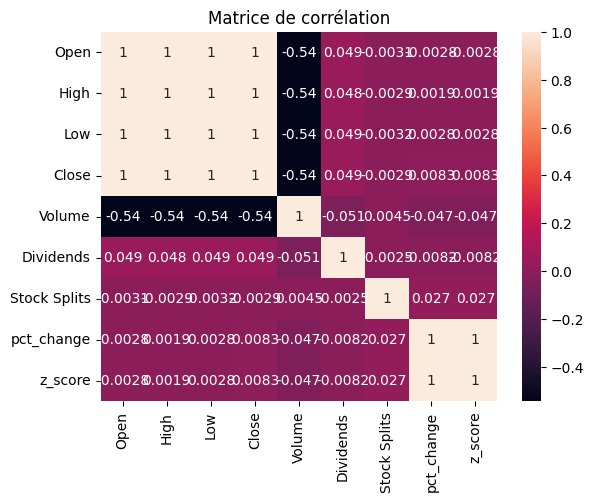

In [15]:
correlation_matrix = apple_df.select_dtypes(include=np.number).corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title("Matrice de corrélation")
plt.show()

Utilisons certaines de ces colonnes pour réaliser un modèle simple de prédiction. Essayer de réaliser une régression linéaire du cours de clôture à partir de colonnes que vous jugez pertinentes.

In [16]:
y = apple_df[CLOSE]
X = apple_df.drop(columns=[CLOSE]).fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
lr_model.coef_

array([-4.57857911e-01,  7.45025896e-01,  7.13050506e-01,  6.55775947e-11,
        4.47581127e-01, -3.75228049e-03,  4.25140652e-03,  2.42226900e-01])

In [18]:
y_pred = lr_model.predict(X_test)

In [19]:
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.2442859896615568
0.9999433015262086


Est-il possible de faire une prédiction du cours de clôture pour aujourd'hui ? Critiquer la regression linéaire pour cette application.

Bonus 1 : s'il vous reste du temps, essayer de réaliser une ARIMA sur le cours de clôture.

In [20]:
mod = ARIMA(apple_df[CLOSE])
res = mod.fit()
print(res.summary())

c:\Users\bspeziale\tuto-projects\personnel-confidentiel\python\iyt\python-ds-202507\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bspeziale\tuto-projects\personnel-confidentiel\python\iyt\python-ds-202507\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bspeziale\tuto-projects\personnel-confidentiel\python\iyt\python-ds-202507\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3774
Model:                          ARIMA   Log Likelihood              -21138.597
Date:                Mon, 21 Jul 2025   AIC                          42281.193
Time:                        09:23:00   BIC                          42293.665
Sample:                             0   HQIC                         42285.627
                               - 3774                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.4333      1.756     38.395      0.000      63.991      70.876
sigma2      4290.3480    180.707     23.742      0.000    3936.169    4644.527
Ljung-Box (L1) (Q):                3766.19   Jarque-

A noter que vu l'ordre choisi (0, 0, 0), ce modèle prédira toujours la moyenne de la série.

In [23]:
forecast_steps = 30
forecast = res.get_forecast(steps=forecast_steps)
forecast_df = forecast.summary_frame()

c:\Users\bspeziale\tuto-projects\personnel-confidentiel\python\iyt\python-ds-202507\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\bspeziale\tuto-projects\personnel-confidentiel\python\iyt\python-ds-202507\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [28]:
forecast_df.head()

Close,mean,mean_se,mean_ci_lower,mean_ci_upper
3774,67.433258,65.500748,-60.94585,195.812365
3775,67.433258,65.500748,-60.94585,195.812365
3776,67.433258,65.500748,-60.94585,195.812365
3777,67.433258,65.500748,-60.94585,195.812365
3778,67.433258,65.500748,-60.94585,195.812365


In [35]:
mod = ARIMA(apple_df[CLOSE], order=(5, 0, 1))
res = mod.fit()
print(res.summary())
forecast_steps = 100
forecast = res.get_forecast(steps=forecast_steps)
forecast_df = forecast.summary_frame()
forecast_df.head()

c:\Users\bspeziale\tuto-projects\personnel-confidentiel\python\iyt\python-ds-202507\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bspeziale\tuto-projects\personnel-confidentiel\python\iyt\python-ds-202507\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bspeziale\tuto-projects\personnel-confidentiel\python\iyt\python-ds-202507\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bspeziale\tuto-projects\personnel-con

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3774
Model:                 ARIMA(5, 0, 1)   Log Likelihood               -7076.772
Date:                Mon, 21 Jul 2025   AIC                          14169.545
Time:                        09:28:01   BIC                          14219.432
Sample:                             0   HQIC                         14187.281
                               - 3774                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.6444    673.166      0.100      0.920   -1251.737    1387.026
ar.L1          0.0759      0.033      2.269      0.023       0.010       0.142
ar.L2          0.8879      0.033     26.533      0.0

c:\Users\bspeziale\tuto-projects\personnel-confidentiel\python\iyt\python-ds-202507\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\bspeziale\tuto-projects\personnel-confidentiel\python\iyt\python-ds-202507\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\bspeziale\tuto-projects\personnel-confidentiel\python\iyt\python-ds-202507\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Close,mean,mean_se,mean_ci_lower,mean_ci_upper
3774,249.969507,1.576239,246.880135,253.058879
3775,250.174692,2.218317,245.826870,254.522514
3776,250.183110,2.687986,244.914754,255.451466
3777,250.210734,3.069897,244.193847,256.227621
3778,250.142523,3.395032,243.488383,256.796664


Reconstituer l'index des dates futures (en vue d'un futur graphe)

In [ ]:
last_date = apple_df.index[-1]
future_dates = pd.date_range(start=last_date + BDay(1), periods=forecast_steps, freq=BDay())
forecast_df.index = future_dates

Réaliser la visualisation.

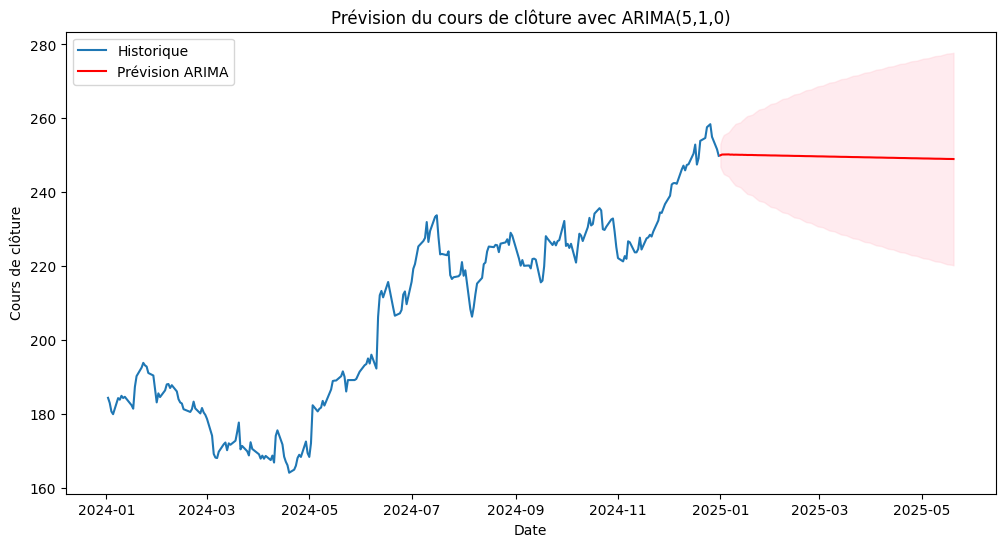

In [38]:
apple_recent = apple_df[apple_df.index >= "2024-01-01"]

plt.figure(figsize=(12, 6))
plt.plot(apple_recent.index, apple_recent[CLOSE], label="Historique")
plt.plot(forecast_df.index, forecast_df["mean"], label="Prévision ARIMA", color='red')
plt.fill_between(forecast_df.index, forecast_df["mean_ci_lower"], forecast_df["mean_ci_upper"], color='pink', alpha=0.3)
plt.title("Prévision du cours de clôture avec ARIMA(5,1,0)")
plt.xlabel("Date")
plt.ylabel("Cours de clôture")
plt.legend()
plt.show()

Sans information contextuelle supplémentaire, la prévision moyen terme reste compliquée.

Bonus 2 : créer une table dans une base de données sqlite3 avec la date et le cours de clôture. Prévoir un upsert (insert/update) pour le cas où l'export traité n'est pas le premier.

Créer une base de données locale SQLite (ou s'y connecter si elle existe).

In [ ]:
conn = sqlite3.connect("apple_stock.db")
cursor = conn.cursor()

Créer une table. Ajouter la date comme clef primaire.

In [ ]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS apple_close (
    date TEXT PRIMARY KEY,
    close REAL
)
""")

Réaliser l'upsert de chaque ligne.

In [ ]:
for index, row in apple_df.iterrows():
    cursor.execute("""
    INSERT INTO apple_close (date, close)
    VALUES (?, ?)
    ON CONFLICT(date) DO UPDATE SET
        close=excluded.close
    """, (index.strftime("%Y-%m-%d"), row[CLOSE]))

In [ ]:
conn.commit()
conn.close()

Vérification : lire les 5 premières lignes de la table.

In [41]:
conn = sqlite3.connect("apple_stock.db")
query = "SELECT * FROM apple_close ORDER BY date ASC LIMIT 5"
df_head = pd.read_sql_query(query, conn)
print(df_head)
conn.close()

         date     close
0  2010-01-04  6.431898
1  2010-01-05  6.443017
2  2010-01-06  6.340532
3  2010-01-07  6.328809
4  2010-01-08  6.370886
